# Danendra Dipa Dananjaya
# 22537141003
# Linear Regression

## Import Libraries And Dataset

In [1]:
import pandas as pd
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
house_df = pd.read_csv('house_data.csv')
house_df

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


Penjelasan kolom :

LB : Luas bangunan

LT : Luas tanah

KT : Kamar tidur

KM : Kamar mandi

GRS : Garasi

In [3]:
house_df.columns = house_df.columns.str.lower()
house_df

,no,nama rumah,harga,lb,lt,kt,km,grs
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [4]:
house_df = house_df.drop(columns=['no', 'nama rumah'])
house_df

,harga,lb,lt,kt,km,grs
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3
...,...,...,...,...,...,...
1005,9000000000,450,550,10,10,3
1006,4000000000,160,140,4,3,2
1007,4000000000,139,230,4,4,1
1008,19000000000,360,606,7,4,0


In [5]:
house_df.shape

(1010, 6)

In [6]:
house_df.head()

,harga,lb,lt,kt,km,grs
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


## Assessing Data and Cleaning Data

In [7]:
#Memeriksa parameter statistik dari house df
house_df.describe()

,harga,lb,lt,kt,km,grs
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [8]:
#Memeriksa missing value 
house_df.isna().sum()

harga    0
lb       0
lt       0
kt       0
km       0
grs      0
dtype: int64

tidak ada missing value

In [9]:
#Memeriksa tipe data dari tiap kolom masing masing
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   harga   1010 non-null   int64
 1   lb      1010 non-null   int64
 2   lt      1010 non-null   int64
 3   kt      1010 non-null   int64
 4   km      1010 non-null   int64
 5   grs     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


karena semua sudah int maka tidak perlu diubah

## Exploratory Data Analysis

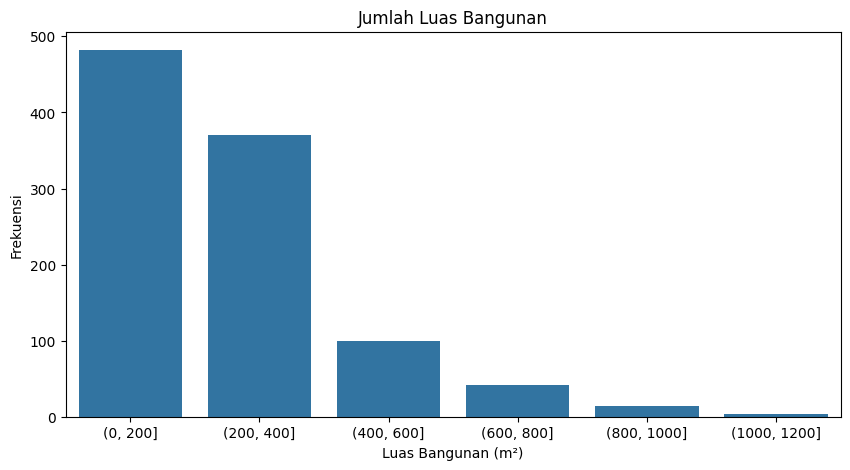

In [10]:
# Visualisasi Luas Bangunan
bins = range(0, int(house_df['lb'].max()) + 200, 200)
plt.figure(figsize=(10, 5))  
sns.countplot(x=pd.cut(house_df['lb'], bins=bins)) 
plt.title('Jumlah Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Frekuensi')

# Menampilkan plot
plt.show()

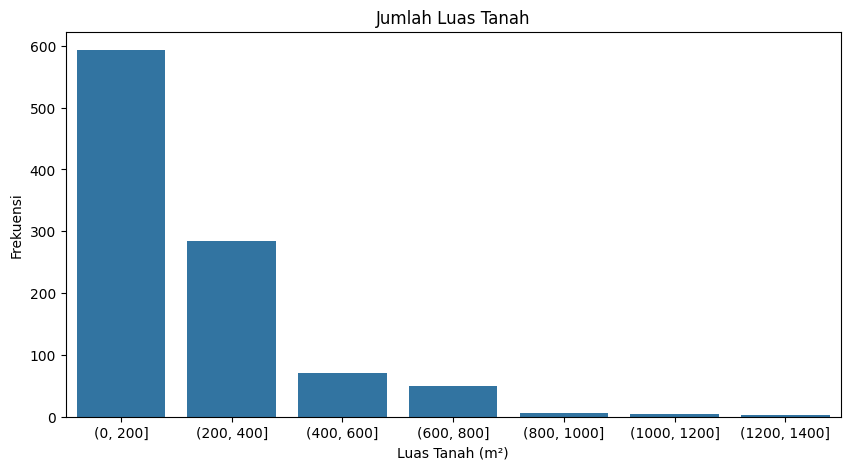

In [11]:
# Visualisasi luas tanah
bins_lt = range(0, int(house_df['lt'].max()) + 200, 200)

plt.figure(figsize=(10, 5))
sns.countplot(x=pd.cut(house_df['lt'], bins=bins_lt)) 
plt.title('Jumlah Luas Tanah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Frekuensi')
plt.show()

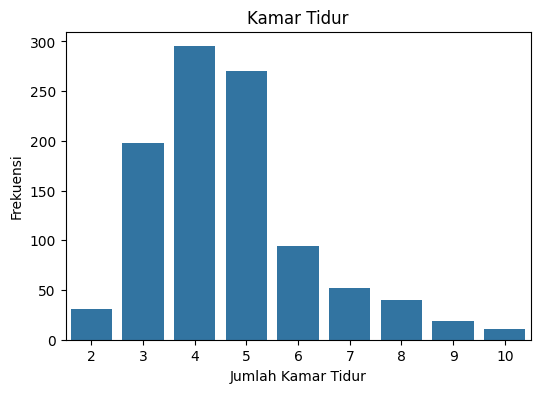

In [12]:
# Countplot untuk jumlah kamar tidur
plt.figure(figsize=(6, 4))  
sns.countplot(x='kt', data=house_df)
plt.title('Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Frekuensi')
plt.show()  
